# Importing libraries and loading + getting basic information about the dataset

## Imoporting libraries and loading dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_excel("mental_health_survey.xlsx",sheet_name="Form responses 1")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1053 non-null   int64  
 1   Gender                        1052 non-null   object 
 2   Hours of Sleep per Night      1049 non-null   float64
 3   Stress Level                  1045 non-null   float64
 4   Exercise Frequency            1048 non-null   float64
 5   Social Interaction Frequency  1045 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 49.5+ KB


## Getting basic information about the dataset

In [42]:
print(df.head())

print(f"Dataset shape: {df.shape}")

   Age  Gender  Hours of Sleep per Night  Stress Level  Exercise Frequency  \
0   23  Female                       6.0           6.0                 3.0   
1   23    Male                       7.0           7.0                 1.0   
2   20  Female                       6.0           1.0                 0.0   
3   20    Male                       3.0           7.0                 3.0   
4   23  Female                       6.0           8.0                 0.0   

   Social Interaction Frequency  
0                           4.0  
1                           3.0  
2                           4.0  
3                           4.0  
4                           3.0  
Dataset shape: (1053, 6)


Missing Data Count: 
Age                             0
Gender                          1
Hours of Sleep per Night        4
Stress Level                    8
Exercise Frequency              5
Social Interaction Frequency    8
dtype: int64


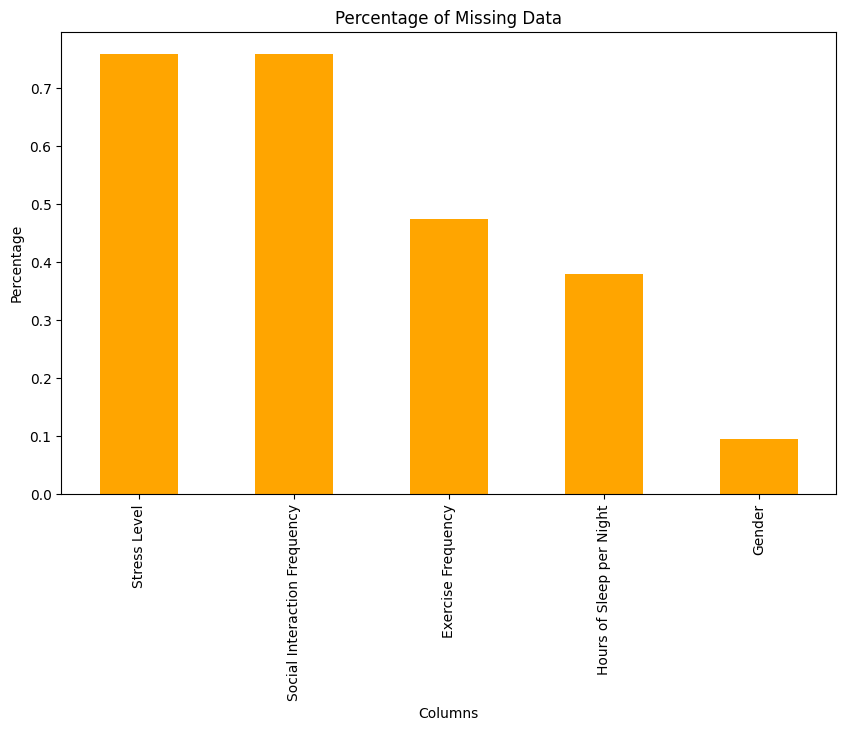

In [43]:
print("Missing Data Count: ")
print(df.isnull().sum())
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


we have some missing values in stress level, social interaction frequency, excercise frequency and hours of sleep per night column. we will fill them in next section.

In [44]:
df.nunique()

Age                             48
Gender                           3
Hours of Sleep per Night        36
Stress Level                    10
Exercise Frequency               8
Social Interaction Frequency    11
dtype: int64

# Data Preprocessing

## Dropping Timestamp and handling missing values

In [45]:
categorical_columns = ['Gender', 'Social Interaction Frequency']
ordinal_columns = ['Exercise Frequency']
numerical_columns = ['Age', 'Stress Level', 'Hours of Sleep per Night']

# Impute categorical columns with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute ordinal columns with mode
for col in ordinal_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical columns based on specified strategies
for col in numerical_columns:
    if col == 'Stress Level': 
        df[col].fillna(round(df[col].mean()), inplace=True)
    else:  
        df[col].fillna(df[col].median(), inplace=True)

# Check for missing values after imputation
print(df.isnull().sum())


Age                             0
Gender                          0
Hours of Sleep per Night        0
Stress Level                    0
Exercise Frequency              0
Social Interaction Frequency    0
dtype: int64


Missing datas are being filled up by imputed values.

In [46]:
def determine_mental_health(row):
    sleep = row['Hours of Sleep per Night']
    exercise = row['Exercise Frequency']
    social_interaction = row['Social Interaction Frequency']
    
    if sleep > 7 and exercise > 3 and social_interaction >= 3:
        return 'Good'
    elif 5 <= sleep <= 7 and 1 <= exercise <= 3 and social_interaction == 2:
        return 'Fair'
    else:
        return 'Poor'

# Apply the function to each row in the DataFrame
df['Mental Health Status'] = df.apply(determine_mental_health, axis=1)


calculating the mental health status column by the formula provided in the question.

In [47]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 173
Number of duplicate rows: 0


Dropping the duplicate columns.

In [48]:
df = df[(df["Exercise Frequency"] >= 0) & (df["Exercise Frequency"] <= 4)]

Removing the Exercise Frequency column values that are not in the range of 0 to 4.

In [49]:
df = df[(df["Social Interaction Frequency"] >= 0) & (df["Social Interaction Frequency"] <= 4)]

Removing the Social Interaction column values that are not in the range of 0 to 4.

In [50]:
df.head()

,Age,Gender,Hours of Sleep per Night,Stress Level,Exercise Frequency,Social Interaction Frequency,Mental Health Status
0,23,Female,6.0,6.0,3.0,4.0,Poor
1,23,Male,7.0,7.0,1.0,3.0,Poor
2,20,Female,6.0,1.0,0.0,4.0,Poor
3,20,Male,3.0,7.0,3.0,4.0,Poor
4,23,Female,6.0,8.0,0.0,3.0,Poor


In [51]:
df["Mental Health Status"].value_counts()

Mental Health Status
Poor    658
Fair    132
Good     22
Name: count, dtype: int64

In [52]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           812 non-null    int64  
 1   gender                        812 non-null    object 
 2   hours_of_sleep_per_night      812 non-null    float64
 3   stress_level                  812 non-null    float64
 4   exercise_frequency            812 non-null    float64
 5   social_interaction_frequency  812 non-null    float64
 6   mental_health_status          812 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 50.8+ KB


# Univariate analysis

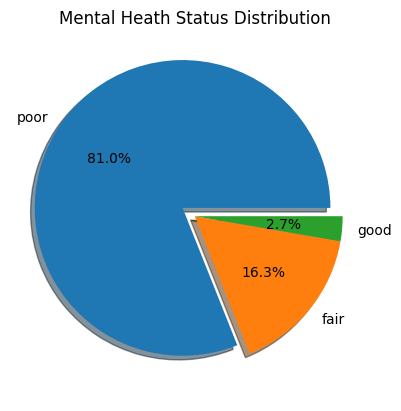

In [53]:
#heath status analysis
mental_health_count= df['mental_health_status'].value_counts()
plt.pie(mental_health_count.values,labels= ["poor","fair","good"],explode=(0.1,0,0),autopct="%.1f%%",shadow=True)
plt.title('Mental Heath Status Distribution')
plt.show()


It is a matter of regret that most of the people existing in the dataset have poor mental health status(81.0%). Least amount of people have good mental health status(2.7%). Overall this target class is not balanced.

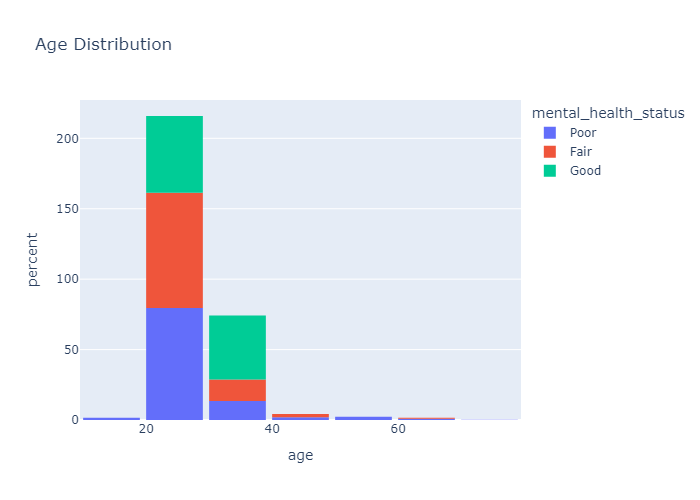

In [54]:
# Age Distribution
fig = px.histogram(df, x='age', title='Age Distribution', nbins=7, color='mental_health_status',histnorm='percent')
fig.update_layout(bargap=0.1)
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive

Most of the people of dataset are in the age group of 20-29 and 30-39 years. in 10-19 age group everyone(11) has poor mental health. In 20-29 age group 54.54% of the people(12) who are of good mental health exists but the number is too low. Most of the peopple here are of poor mental health which contributes to the 79.48% (523 people) of total poor mental health people. There is almost 81.81% (108 people) of the people who are of fair mental health belongs here. IN age 30-39 group 45.45% (10) of the people have good mental health which is the highest in this age group. 14.52% (89) of the people having poor mental health are here. 15.15% (20) of the people having fair mental health are here. In 40-49, 50-59 age group there are no people of fair mental health.
- Note: here all percentages are relative i.e. percentages are calculated based on total number of people in that mental health status category.

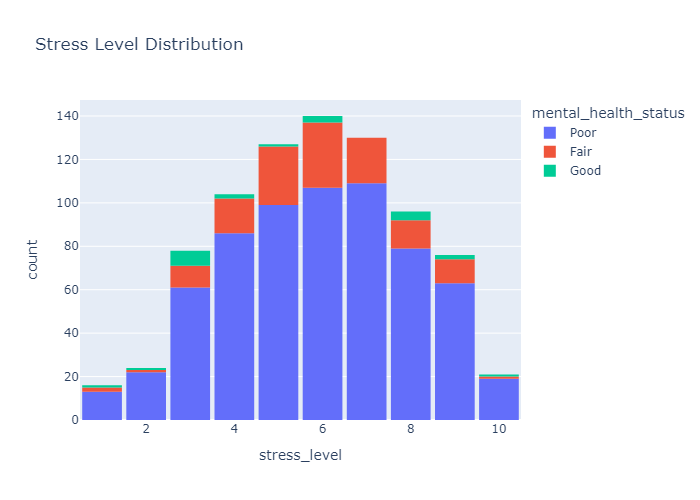

In [55]:
# Stress Level Distribution
fig = px.histogram(df, x='stress_level', title='Stress Level Distribution', nbins=10, color='mental_health_status')
fig.update_layout(bargap=0.1)
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive

As most of the people have poor mental health this is the major count on every stress level. but its seen that fair mental health peoples have mostly stress level raning from 3 to 9. and good mental health belonging people have low counts in each class ranging between 1-7.

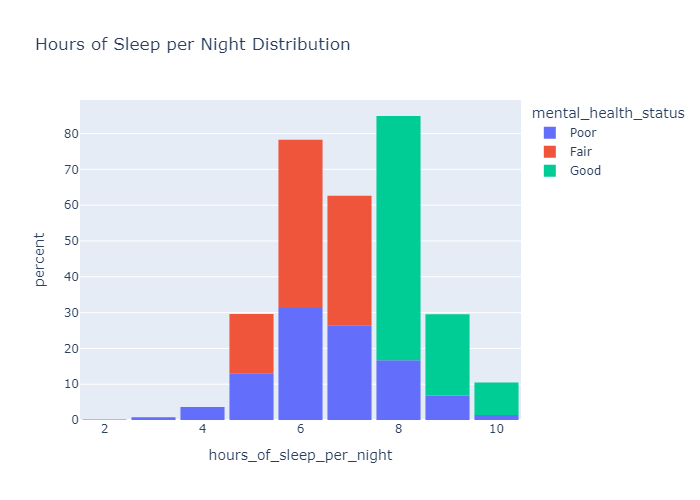

In [56]:
# Sleep Hours Distribution
fig = px.histogram(df, x='hours_of_sleep_per_night', title='Hours of Sleep per Night Distribution', nbins=10, color='mental_health_status', histnorm='percent')
fig.update_layout(bargap=0.1)
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


It is a clear insight from here is that people who are of good mental health are sleeping for more hours than people who are of poor mental health. People who are of good mental health are sleeping for more than 8 hours per night and people who are of poor mental health are sleeping for less than 8 hours per night. but the distinguisthment between poor and average mental health is a very tricky here as no specific pattern is seen. but mostly people having sleep less then 5 hours have poor mental health.

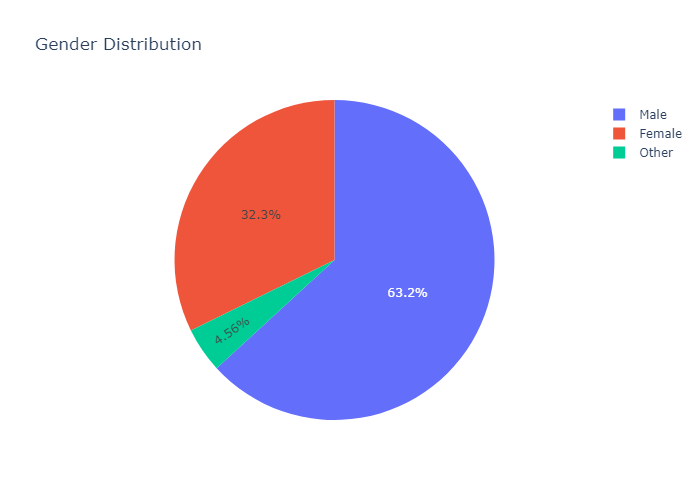

In [57]:
# Pie chart for Gender distribution
fig = px.pie(df, names='gender', title='Gender Distribution')
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


The gender distribution across dataset is not uniform. It is clear that there are more males than females in the dataset with the minority of other groups.

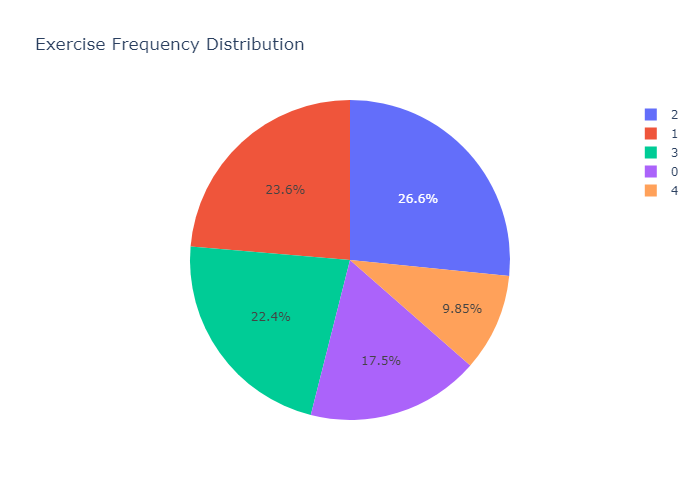

In [58]:
# Pie chart for Exercise Frequency
fig = px.pie(df, names='exercise_frequency', title='Exercise Frequency Distribution')
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


it is seen that there are less amount of people who do any kinds of regularly(9.85%). and in general people do excersise sometimes(highest),often(3rd highest) or rarely(2nd highest). there are also people who dont do exercise at all(17.5%).

# Bivariate Analysis

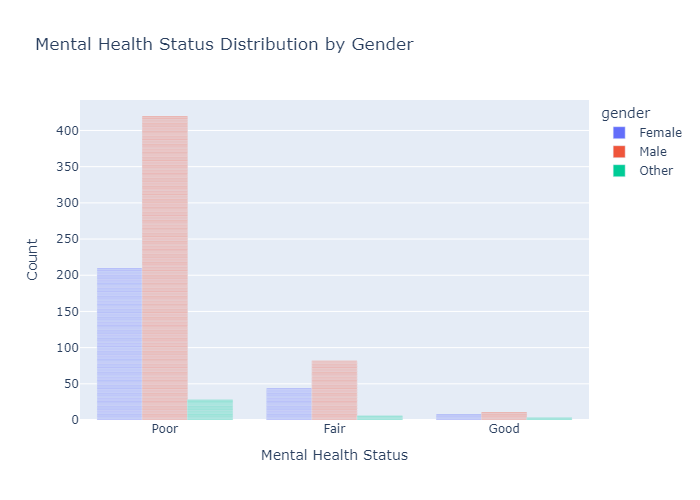

In [59]:
#Gender vs Mental Health Status
fig = px.bar(df, x='mental_health_status', color='gender', barmode='group',
             title='Mental Health Status Distribution by Gender', 
             labels={'mental_health_status': 'Mental Health Status', 'count': 'Count'})
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


it is seen that every gender are most depressed i.e. have poor mental health in general and it is clear that good mental health is less in all classes.

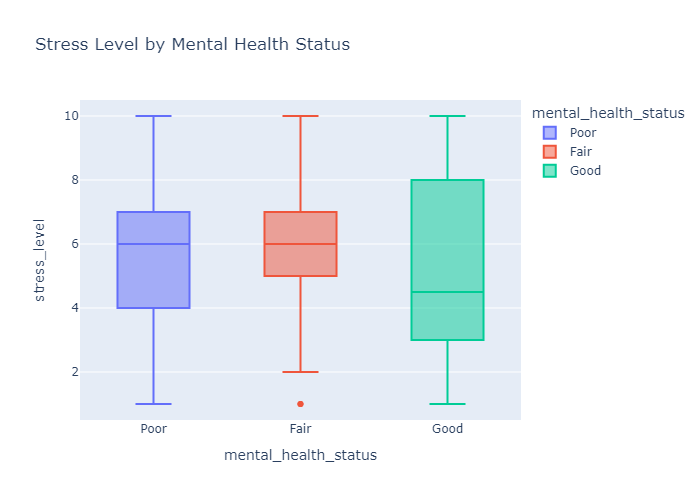

In [60]:
#Stress Level vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='stress_level', title='Stress Level by Mental Health Status', color='mental_health_status')
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


It is clearly seen that stress level in good mental health status is less and in poor and fair mental health status is more. In good the median is 4.5 and in fair and poor the median is 6 but in case of poor and fair mental health the data varies from 1 to 10 range and in fir vclass most of the data fells between 5 to 7.

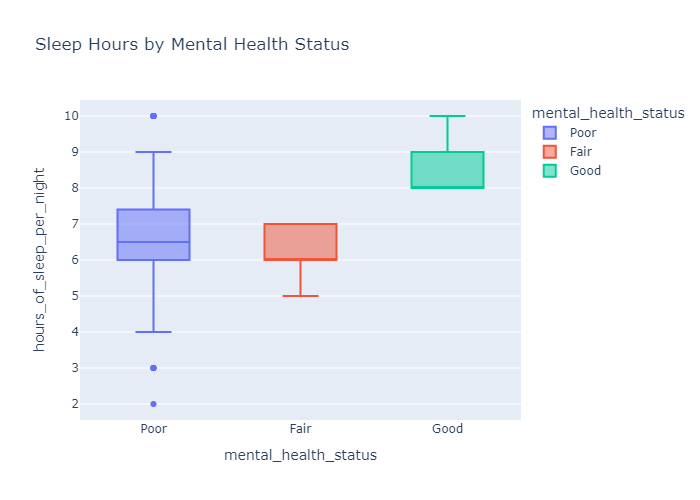

In [61]:
#Sleep Hours vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='hours_of_sleep_per_night', title='Sleep Hours by Mental Health Status', color='mental_health_status')
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive

sleep is a confusing indicator here. People who sleep more than 8 hours carry good mental health but people who sleep 6 hours in average have fair mental health and people who sleep 6.5 hour in average have poor mental health. it is not a clear indicator of mental health.

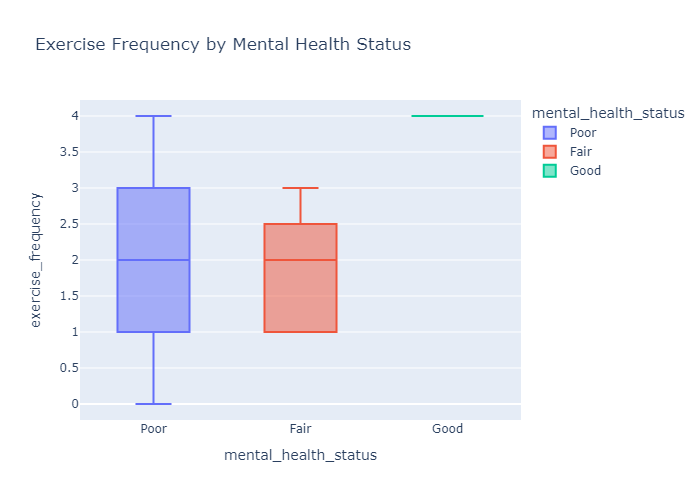

In [62]:
#Exercise Frequency vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='exercise_frequency', title='Exercise Frequency by Mental Health Status',color='mental_health_status')
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive

people who excercise daily have good mental health but it is also confusing in case of poor and fair mental health status. both categories have people who sometimes excersises in average but the range of values in poor is more wide then the fair category.

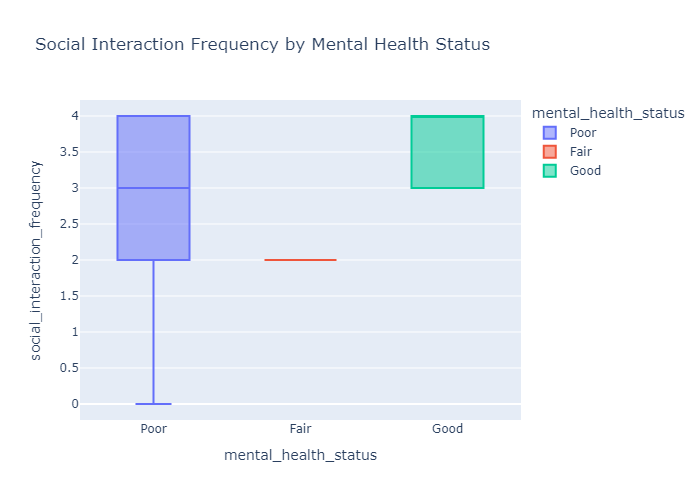

In [63]:
#Social Interaction Frequency vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='social_interaction_frequency', 
             title='Social Interaction Frequency by Mental Health Status', color='mental_health_status')
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


the people who have regular or often might have good mental health but its also true for poor as the poor class has a median of 3 which indicates to often excercise. the fair class is fixed in 2 which indicates to sometimes excercise. That mostly means people can have good social interaction but still be of poor mental health status.

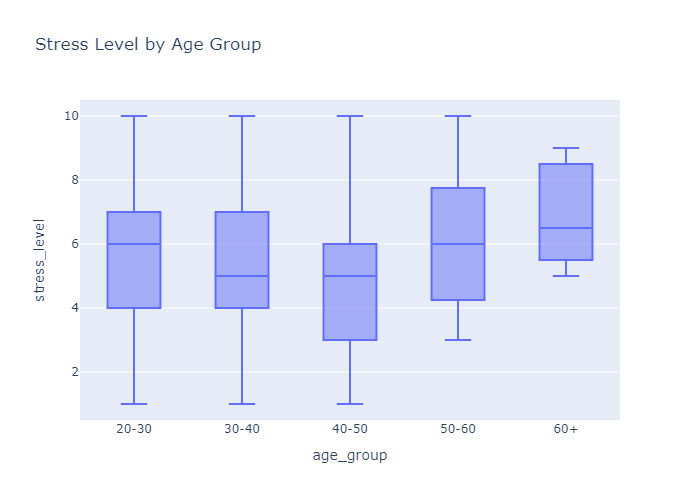

In [64]:
# Stress level by age groups
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 100], labels=["20-30", "30-40", "40-50", "50-60", "60+"], right=False)

# Boxplot for Stress Level by Age Group
fig = px.box(df, x='age_group', y='stress_level', title='Stress Level by Age Group')
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


all age groups have median in stress level of 5 to 6.5 but the range of values differ from each other but the range of values are most wide in 20-50 age gorups. The lowest stress level belongs to 40-50 age group and the higest belong to 60+. 2nd higest belongs to 20-30 and 50-60 age groups.

# Multivariate Analysis

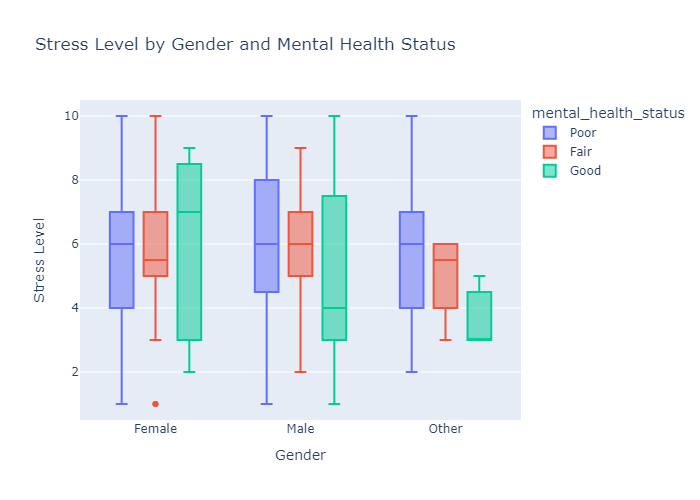

In [65]:
# Stress Level by Gender and Mental Health Status
fig = px.box(df, x='gender', y='stress_level', color='mental_health_status',
             title='Stress Level by Gender and Mental Health Status', 
             labels={'gender': 'Gender', 'stress_level': 'Stress Level'})
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive

in general people with less stress levels are with good mental health. also one thing to notice is that females of good mental health has more stress level in average than male and also its more than fair and poor in female class.

## Saving the cleaned dataset

In [66]:
df.to_csv('mental_health_survey_cleaned_data.csv', index=False)

## Label Encoding

In [67]:
df_label = df.copy()

onehot_columns = ['gender']
df_label = pd.get_dummies(df, columns=onehot_columns)

scaler = StandardScaler()
columns_to_scale = ['age', 'hours_of_sleep_per_night', 'stress_level',
                      'exercise_frequency', 'social_interaction_frequency']
df_label[columns_to_scale] = scaler.fit_transform(df_label[columns_to_scale])

label_encoder = LabelEncoder()
df_label["mental_health_status"] = label_encoder.fit_transform(df["mental_health_status"])

print(df_label.head())

        age  hours_of_sleep_per_night  stress_level  exercise_frequency  \
0 -0.599741                 -0.439119      0.065398            0.942806   
1 -0.599741                  0.348347      0.543804           -0.675711   
2 -1.021255                 -0.439119     -2.326633           -1.484969   
3 -1.021255                 -2.801515      0.543804            0.942806   
4 -0.599741                 -0.439119      1.022210           -1.484969   

   social_interaction_frequency  mental_health_status age_group  \
0                      1.199591                     2     20-30   
1                      0.347388                     2     20-30   
2                      1.199591                     2     20-30   
3                      1.199591                     2     20-30   
4                      0.347388                     2     20-30   

   gender_Female  gender_Male  gender_Other  
0           True        False         False  
1          False         True         False  
2       

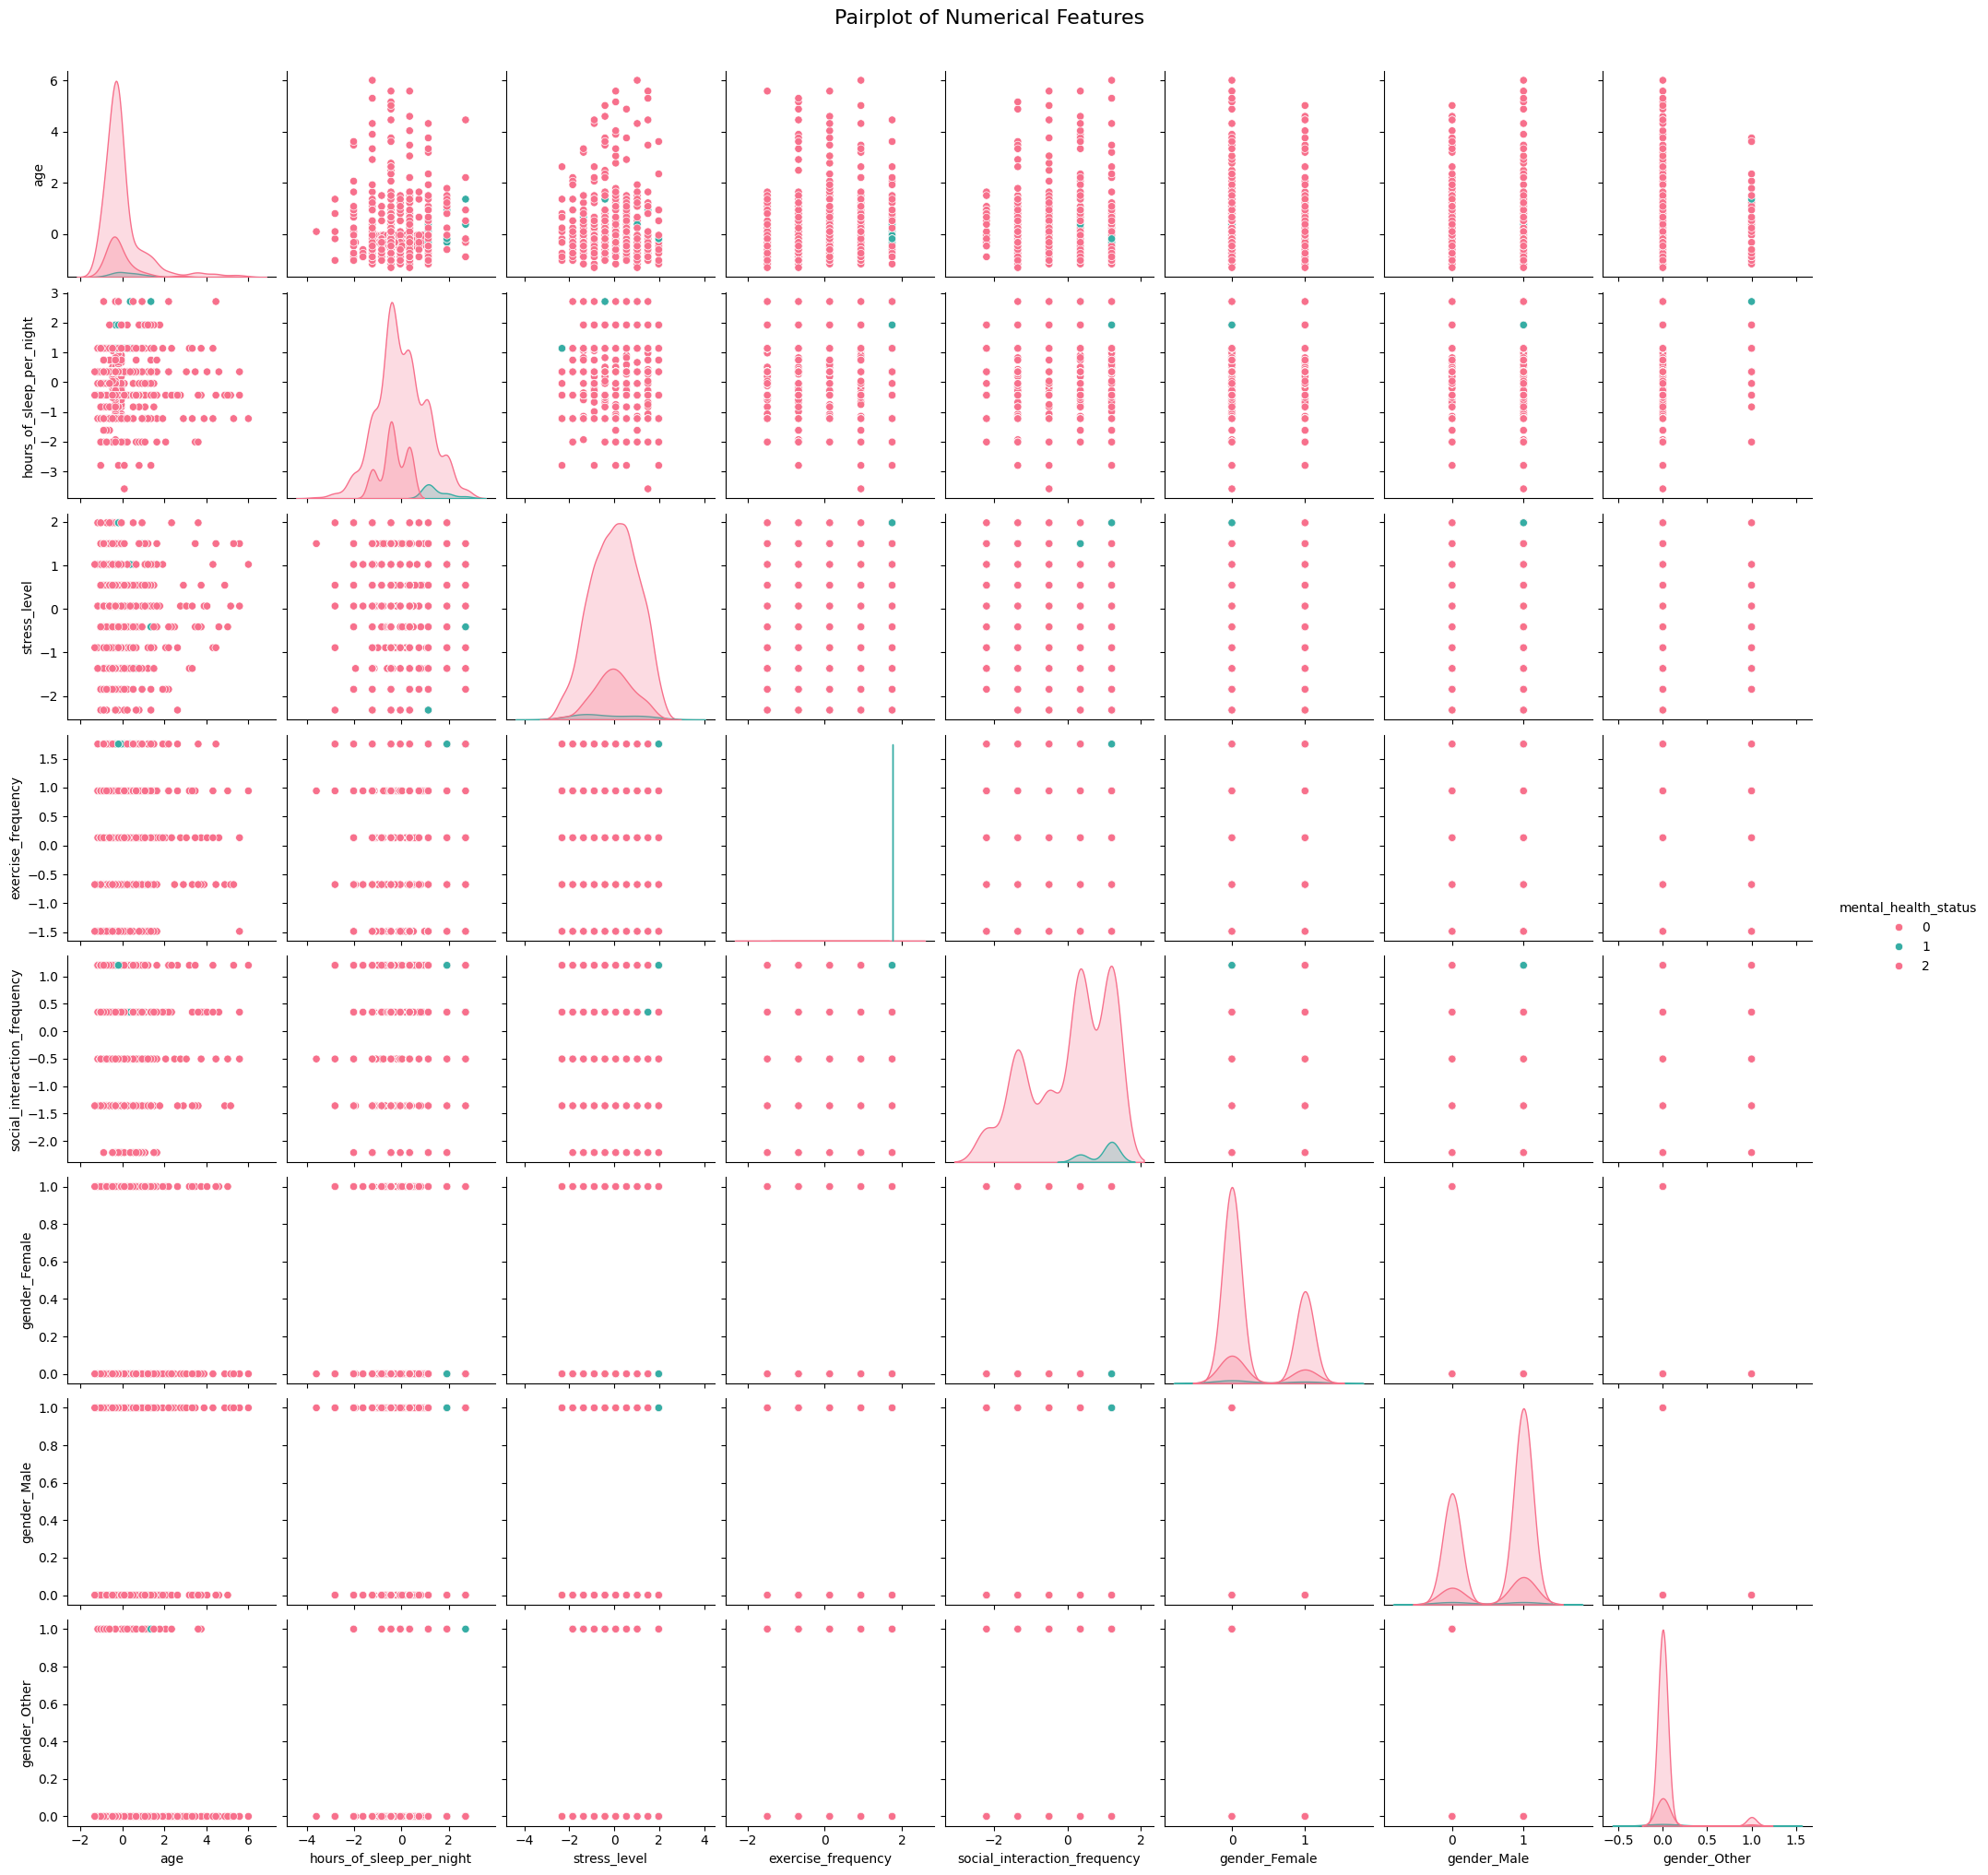

In [68]:
#pairplot
sns.pairplot(df_label, hue='mental_health_status', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

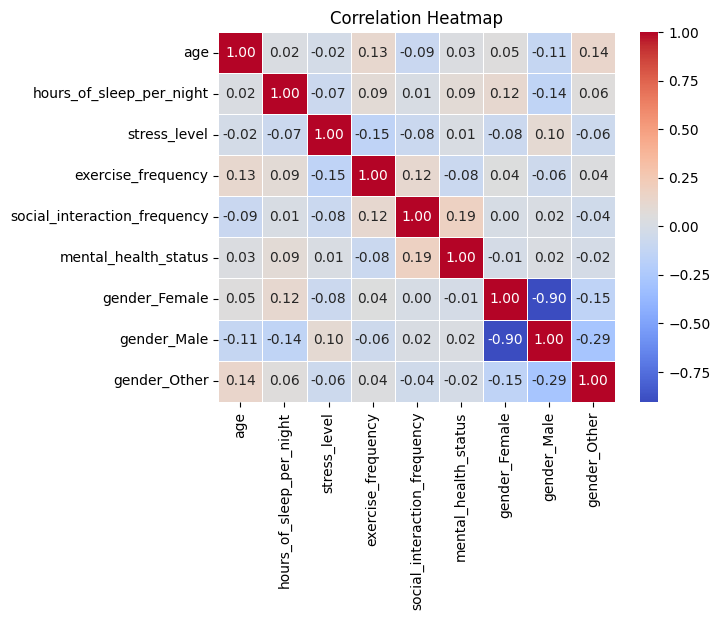

In [69]:
df_label.drop("age_group", axis=1, inplace=True)
sns.heatmap(df_label.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [70]:
df_label.corr()['mental_health_status'].sort_values(ascending=False)

mental_health_status            1.000000
social_interaction_frequency    0.185422
hours_of_sleep_per_night        0.087462
age                             0.031354
gender_Male                     0.019522
stress_level                    0.012597
gender_Female                  -0.013172
gender_Other                   -0.015624
exercise_frequency             -0.079315
Name: mental_health_status, dtype: float64

#### Positive Correlations with Mental Health Status:
- **`social_interaction_frequency` (0.19):** Strongest positive influence on mental health.
- **`hours_of_sleep_per_night` (0.09):** More sleep improves mental well-being by a slight margin.

#### Negative Correlations with Mental Health Status:
- No mentionworthy negative correlations were found.

#### Key Multicollinearities:
- male,female classes have strong correlations with each other.
---
So, by observing we can lead to an understanding that we can drop 'exercise_frequency','age','gender_Other','stress_level' columns because they dont seem to have mentionworthy correlation with the target variable.



## Summary of Analysis

**Outliers**

- No explicit outliers were identified in the dataset for removal, but the class imbalance in the target variable (Mental Health Status) may influence the overall insights.

**Univariate Analysis**

- **Mental Health Status:**
    - Majority (81.0%) of individuals have poor mental health.
    - Only 2.7% of the dataset represents individuals with good mental health.
    - The dataset exhibits significant class imbalance.
- **Age Distribution:**
    - Most individuals are in the age groups of 20–29 and 30–39.
    - Everyone in the 10–19 age group has poor mental health.
    - 54.54% of individuals with good mental health are aged 20–29, though their absolute count is low (12).
    - The 30–39 age group has the highest percentage (45.45%) of individuals with good mental health.
    - Fair mental health is absent in the 40–49 and 50–59 age groups.
- **Stress Level:**
    - People with fair mental health generally have stress levels between 3 and 9.
    - Good mental health is associated with stress levels ranging between 1 and 7, but counts are low.
- **Hours of Sleep:**
    - Good mental health correlates with sleeping more than 8 hours per night.
    - Poor mental health is associated with sleeping less than 8 hours, particularly below 5 hours.
    - Sleep patterns between poor and fair mental health show no clear distinction.
- **Gender Distribution:**
    - The dataset is imbalanced with more males than females and fewer individuals identifying as other genders.
- **Exercise Frequency:**
    - Only 9.85% of individuals exercise daily.
    - Most individuals exercise sometimes (highest), rarely (second-highest), or often (third-highest).
    - 17.5% of individuals do not exercise at all.

**Bivariate Analysis**

- **Gender vs Mental Health Status:**
    - Poor mental health dominates across all gender categories.
    - Good mental health is consistently less common in all gender groups.
- **Stress Level vs Mental Health Status:**
    - Lower stress levels correlate with good mental health (median: 4.5).
    - Higher stress levels are associated with poor and fair mental health (median: 6), with data ranging from 1 to 10.
- **Sleep vs Mental Health Status:**
    - Good mental health correlates with >8 hours of sleep.
    - Poor mental health is prevalent in individuals sleeping 6.5 hours on average, and fair mental health is common among those sleeping ~6 hours.
    - Sleep is not a clear indicator between poor and fair mental health.
- **Exercise Frequency vs Mental Health Status:**
    - Daily exercise correlates with good mental health.
    - Poor and fair mental health are associated with occasional exercise, but poor mental health has a wider range of exercise frequencies.
- **Social Interaction Frequency vs Mental Health Status:**
    - Individuals with good social interaction can still have poor mental health.
    - Good mental health is associated with regular or frequent social interaction.

**Multivariate Analysis**

- **Correlation Analysis**
    - **Mental Health Status Correlations:**
        - **Positive Correlations:**
            - Social Interaction Frequency: +0.185 (weak positive correlation).
            - Hours of Sleep: +0.087 (weak positive correlation).
            - Age: +0.031 (negligible correlation).
            - Gender (Male): +0.019 (negligible correlation).
        - **Negative Correlations:**
            - Stress Level: -0.012 (negligible correlation).
            - Gender (Female): -0.013 (negligible correlation).
            - Gender (Other): -0.015 (negligible correlation).
            - Exercise Frequency: -0.079 (weak negative correlation).

**Key Observations**

- Social interaction frequency and hours of sleep show the most notable positive correlations with good mental health, but these correlations are weak.
- Stress level is higher in females with good mental health compared to males, and even higher than females in the fair and poor mental health categories.
- Exercise frequency and stress level vary widely, making them less reliable as standalone indicators of mental health.
- Mainly, This can be assumed that there is no significant liner correlation among the data but it doesn't mean there isn't a non linear reationship of higher degrees.

## Classification Analysis

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
features = ['age', 'hours_of_sleep_per_night', 'stress_level', 'exercise_frequency', 'social_interaction_frequency']
target = 'mental_health_status'


X = df_label.drop(target, axis=1)
X_selected_features= df_label[features]
y = df_label[target]

In [73]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    cm = []
    names=[]
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')


        print(f"\nModel: {name}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred,target_names=["Fair","Good","Poor"]))
        cm.append(confusion_matrix(y_test, y_pred))
        names.append(name)

    return cm, names


def confusion_matrix_all_models_display(cm,names):
    for name,cm in zip(names,cm):
        cm_df = pd.DataFrame(cm)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues',xticklabels=["Fair","Good","Poor"],yticklabels=["Fair","Good","Poor"])
        plt.title(f"Confusion Matrix: {name}")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


In [75]:
models = {
    "Logistic Regression max_iter_100": LogisticRegression(max_iter=100, random_state=42),
    "Logistic Regression max_iter_500": LogisticRegression(max_iter=500, random_state=42),
    "Logistic Regression max_iter_1000": LogisticRegression(max_iter=1000, random_state=42),
    "SVM rbf Kernel": SVC(kernel='rbf',probability=True, random_state=42),
    "SVM poly Kernel": SVC(kernel='poly',probability=True, random_state=42),
    "SVM linear Kernel": SVC(kernel='linear',probability=True, random_state=42),
    "Decision Tree gini ": DecisionTreeClassifier(criterion='gini',random_state=42),
    "Decision Tree entropy ": DecisionTreeClassifier(criterion='entropy',random_state=42),
    "Decision Tree log_loss ": DecisionTreeClassifier(criterion='log_loss',random_state=42),
    "Random Forest 5 estimator": RandomForestClassifier(n_estimators=5,random_state=42),
    "Random Forest 10 estimator": RandomForestClassifier(n_estimators=10,random_state=42),
    "Random Forest 20 estimator": RandomForestClassifier(n_estimators=20,random_state=42)
}

confusion_matrix_all_model,names = evaluate_models(models, X_train, X_test, y_train, y_test)



Model: Logistic Regression max_iter_100
Accuracy: 0.85
Precision: 0.74
Recall: 0.85
F1-Score: 0.79

Classification Report:
              precision    recall  f1-score   support

        Fair       0.00      0.00      0.00        22
        Good       0.67      1.00      0.80         4
        Poor       0.86      0.98      0.91       137

    accuracy                           0.85       163
   macro avg       0.51      0.66      0.57       163
weighted avg       0.74      0.85      0.79       163


Model: Logistic Regression max_iter_500
Accuracy: 0.85
Precision: 0.74
Recall: 0.85
F1-Score: 0.79

Classification Report:
              precision    recall  f1-score   support

        Fair       0.00      0.00      0.00        22
        Good       0.67      1.00      0.80         4
        Poor       0.86      0.98      0.91       137

    accuracy                           0.85       163
   macro avg       0.51      0.66      0.57       163
weighted avg       0.74      0.85      0.79  

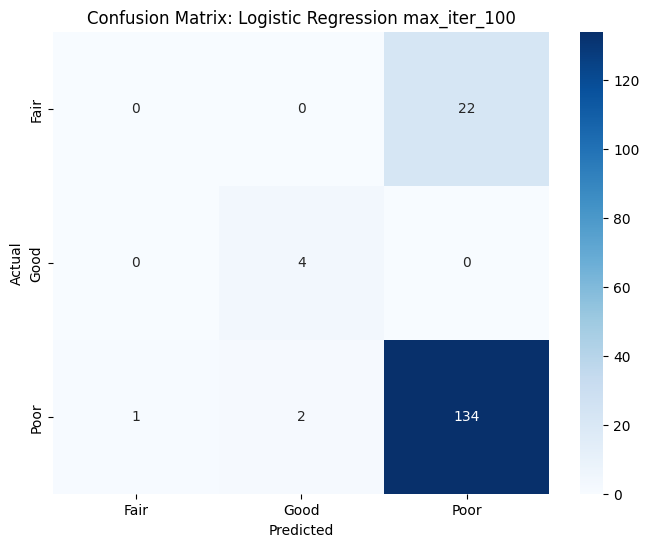

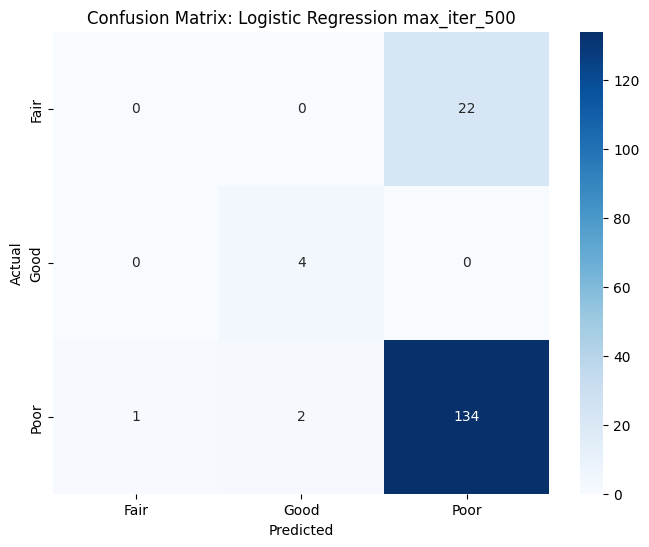

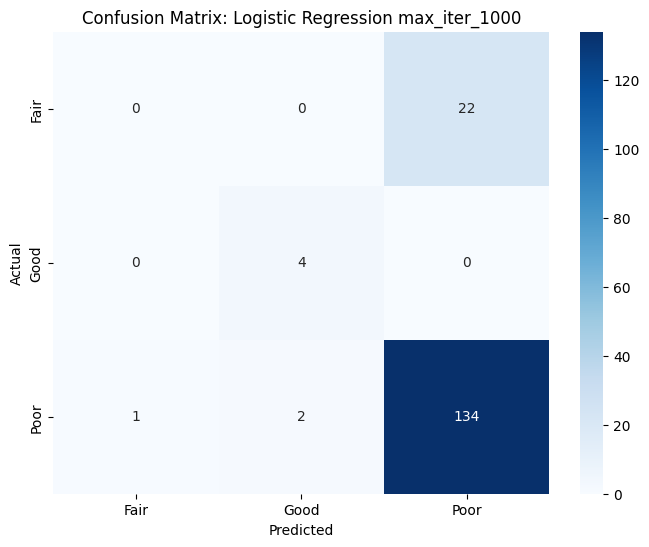

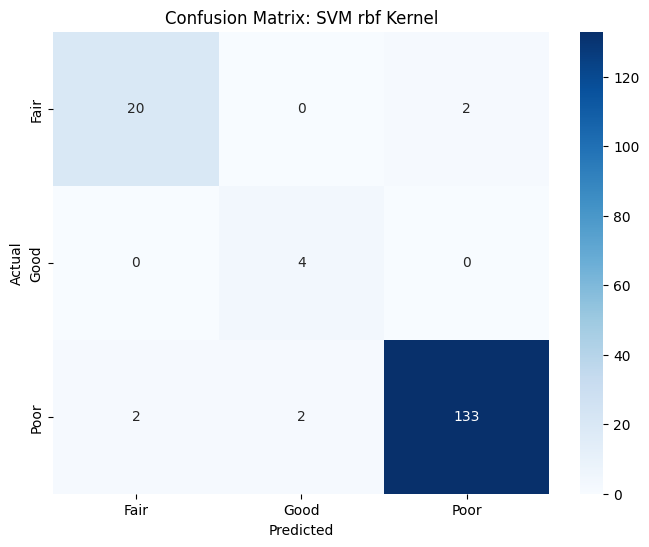

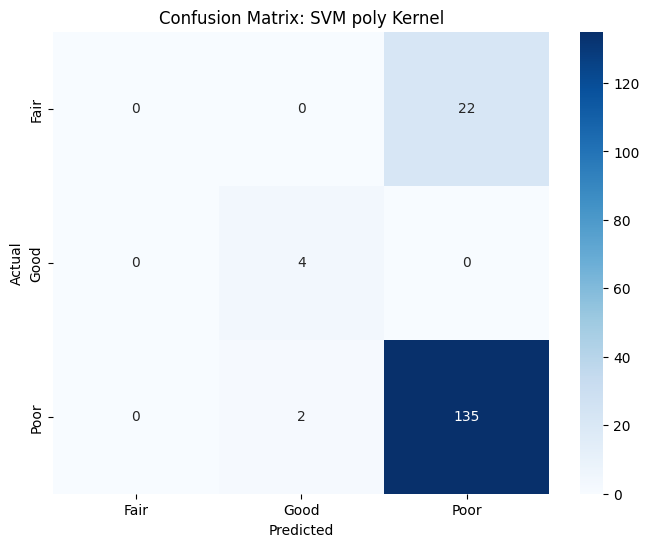

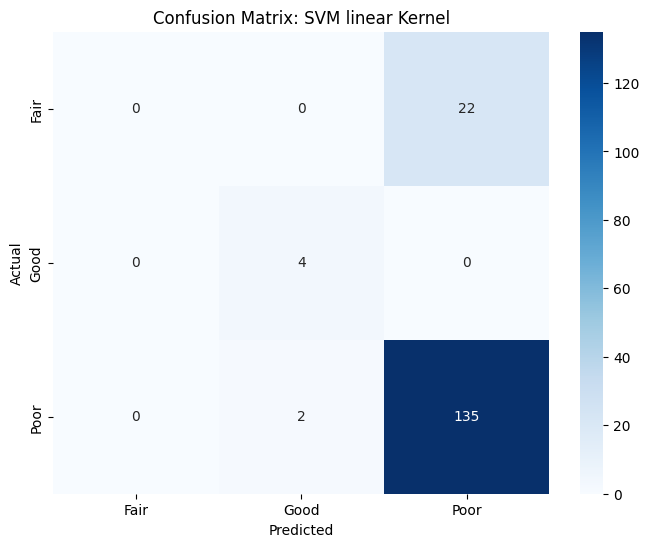

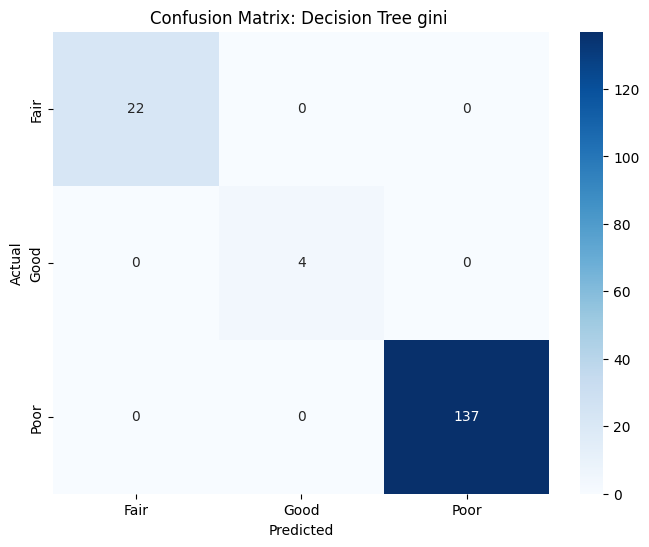

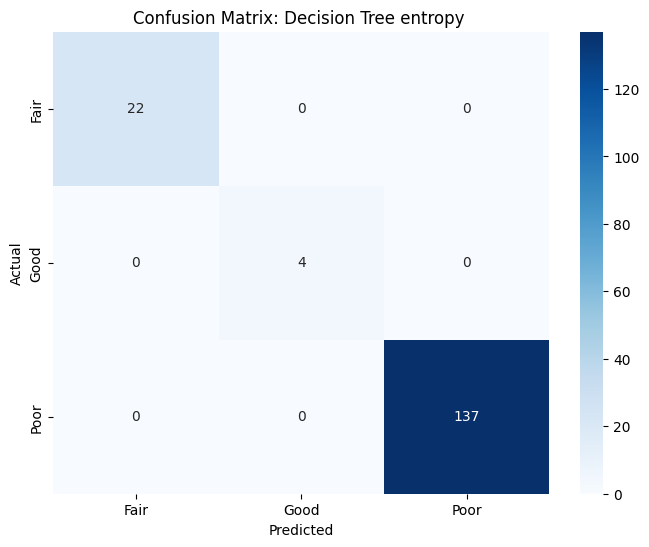

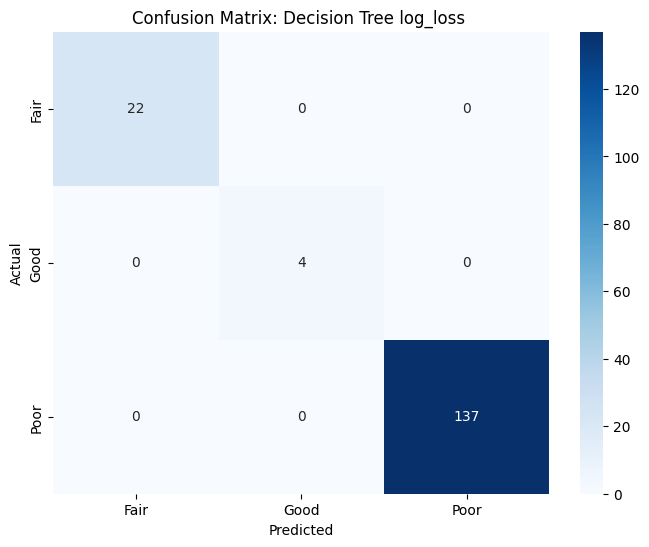

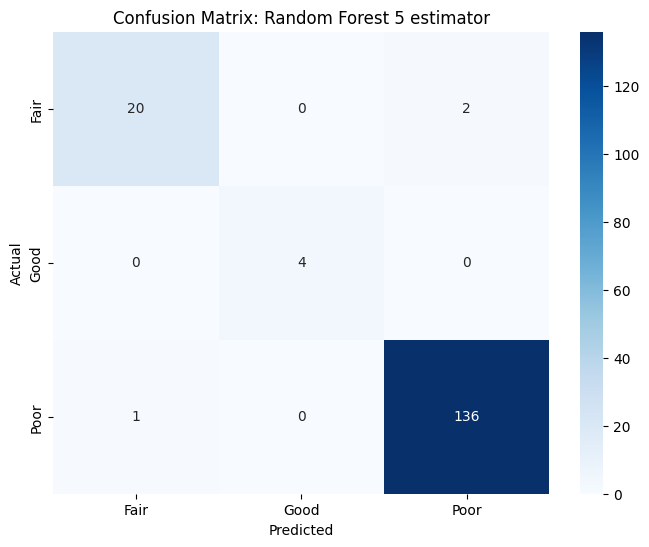

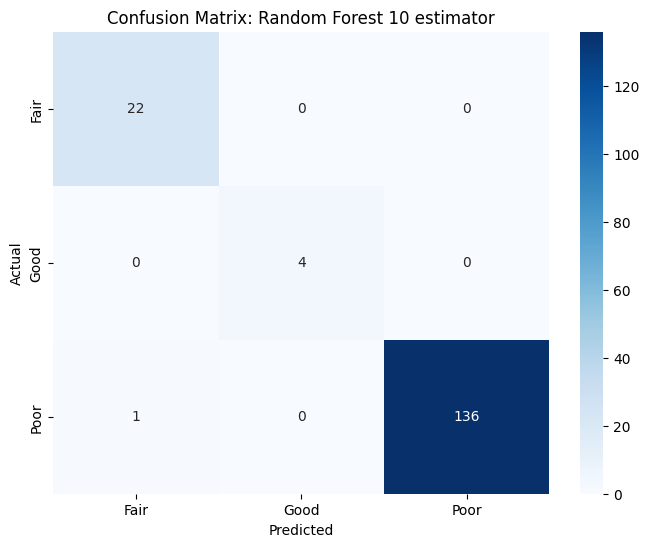

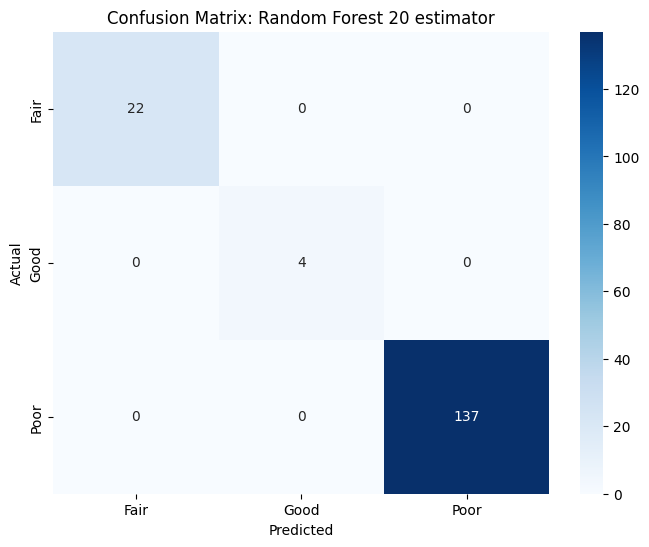

In [76]:
confusion_matrix_all_models_display(confusion_matrix_all_model,names)

In [77]:
for name,cm in zip(names,confusion_matrix_all_model):
    print(f"Confusion Matrix for {name}:")
    print(cm)

Confusion Matrix for Logistic Regression max_iter_100:
[[  0   0  22]
 [  0   4   0]
 [  1   2 134]]
Confusion Matrix for Logistic Regression max_iter_500:
[[  0   0  22]
 [  0   4   0]
 [  1   2 134]]
Confusion Matrix for Logistic Regression max_iter_1000:
[[  0   0  22]
 [  0   4   0]
 [  1   2 134]]
Confusion Matrix for SVM rbf Kernel:
[[ 20   0   2]
 [  0   4   0]
 [  2   2 133]]
Confusion Matrix for SVM poly Kernel:
[[  0   0  22]
 [  0   4   0]
 [  0   2 135]]
Confusion Matrix for SVM linear Kernel:
[[  0   0  22]
 [  0   4   0]
 [  0   2 135]]
Confusion Matrix for Decision Tree gini :
[[ 22   0   0]
 [  0   4   0]
 [  0   0 137]]
Confusion Matrix for Decision Tree entropy :
[[ 22   0   0]
 [  0   4   0]
 [  0   0 137]]
Confusion Matrix for Decision Tree log_loss :
[[ 22   0   0]
 [  0   4   0]
 [  0   0 137]]
Confusion Matrix for Random Forest 5 estimator:
[[ 20   0   2]
 [  0   4   0]
 [  1   0 136]]
Confusion Matrix for Random Forest 10 estimator:
[[ 22   0   0]
 [  0   4   0]

### Classification Model Comparison and Analysis

#### Key Findings from Analysis and Model Results

**Logistic Regression**

- Accuracy remains steady at 0.85 for different max_iter values.
- Poor handling of the "Fair" class (Precision = 0, Recall = 0).
- Strength in predicting the "Poor" class (Precision = 0.86–0.87).
- Unable to adapt to imbalanced class distribution effectively.

**SVM**

* **RBF Kernel:**
    - Accuracy: 0.96.
    - Good balance across classes with higher recall and precision than other models, except Decision Trees.
    - Misclassifies fewer "Fair" instances compared to Logistic Regression.
* **Poly and Linear Kernels:**
    - Similar to Logistic Regression in performance.
    - Fails for the "Fair" class entirely (Precision = 0).

**Decision Tree**

- All criteria (Gini, Entropy, Log Loss) achieve perfect performance (Accuracy = 1.00).
- Extremely high precision and recall across all classes.
- Might indicate potential overfitting due to simplicity of training data.

**Random Forest**

* **5 Estimators:**
    - Accuracy: 0.98.
    - Close to Decision Trees, but shows minor misclassification in "Fair" and "Poor" classes.
* **10 Estimators:**
    - Accuracy: 0.99.
    - Slight improvement in class balance.
* **20 Estimators:**
    - Matches Decision Trees in accuracy and precision.
    - Robust and consistent.

- **Class-Specific Performance:**
  - Models like Logistic Regression and SVM with Linear or Polynomial kernels struggle to identify many "Fair" instances.
  - The "Poor" class is consistently classified with high accuracy, recall, and precision across all models.
  - The "Good" class, with only four instance, is classified perfectly in all cases.

- **Impact of Hyperparameters:**
  - For Logistic Regression, increasing `max_iter` does not affect performance, as all configurations produces the same metrics.
  - For SVM, the choice of kernel significantly impacts performance:
    - **RBF kernel** generalizes better, providing the highest accuracy.
    - **Polynomial kernel** performs moderately well but struggles with "Fair" classification.
    - **Linear kernel** underperforms, failing to classify the "Fair" class entirely.
  - Decision Trees and Random Forests are less sensitive to hyperparameters like the number of estimators or splitting criteria, achieving perfect classification in all cases.

### Conclusion

For this dataset, Decision Trees and Random Forests are the best-performing models, achieving perfect classification. SVM with RBF kernel is a strong alternative. Logistic Regression and SVM with Linear kernel are not suitable due to poor class separation, particularly for the "Fair" class.
